<a href="https://colab.research.google.com/github/irmtou/CS577FinalProject/blob/main/CS577FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
# import warnings
# warnings.filterwarnings('ignore')

In [127]:
df = pd.read_csv('ca_san_diego_2020_04_01.csv')
display(df.head(10))

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,3,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,4,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,5,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC
5,6,2014-01-01,08:39:00,820,30.0,hispanic,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Equipment Violation,Verbal Warning,HISPANIC
6,7,2014-01-01,09:13:00,710,19.0,hispanic,female,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,HISPANIC
7,8,2014-01-01,09:50:00,120,32.0,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Written Warning,WHITE
8,9,2014-01-01,10:00:00,120,36.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
9,10,2014-01-01,10:40:00,120,27.0,hispanic,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,HISPANIC



From observations, here is a reference of all categories
* Index - Indexing from 0
* `raw_row_number` - Indexing from 1
* `date` - yyyy-mm-dd
* `time` - 01:25:00
* `service_area` - Integer
* `subject_age` - Float
* `subject_race` - String
* `subject_sex` - String
* `type` - String
* `arrest_made` - Boolean
* `citation_issued` - String
* `outcome` - String
* `contraband_found` - NaN  
* `search_conducted` - Boolean
* `search_person` - Boolean
* `search_vehicle` - Boolean
* `search_basis` - NaN
* `reason_for_search` - NaN
* `reason_for_stop` - String
* `raw_action_taken` - String
* `raw_subject_race_description` - String



## Some Exploratory Data Analysis

Just a surface level analysis of our dataset


### Datatypes of variables


- Numerical data: `float64`, `int64`
- Categorical data: `object`  

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383027 entries, 0 to 383026
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   raw_row_number                383027 non-null  object 
 1   date                          382844 non-null  object 
 2   time                          382292 non-null  object 
 3   service_area                  383027 non-null  object 
 4   subject_age                   371064 non-null  float64
 5   subject_race                  381793 non-null  object 
 6   subject_sex                   382366 non-null  object 
 7   type                          383027 non-null  object 
 8   arrest_made                   348284 non-null  object 
 9   citation_issued               351056 non-null  object 
 10  warning_issued                351056 non-null  object 
 11  outcome                       343855 non-null  object 
 12  contraband_found              16288 non-null

## Number of null values in the dataset

In [129]:
missing_values = df.isnull().sum()
missing_values

,0
raw_row_number,0
date,183
time,735
service_area,0
subject_age,11963
subject_race,1234
subject_sex,661
type,0
arrest_made,34743
citation_issued,31971


## Finding the percentage of null or missing values

In [130]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

,0
raw_row_number,0.000000
date,0.047777
time,0.191892
service_area,0.000000
subject_age,3.123279
subject_race,0.322170
subject_sex,0.172573
type,0.000000
arrest_made,9.070640
citation_issued,8.346931


## Checking for duplicates

In [131]:
df.nunique()

,0
raw_row_number,383027
date,1186
time,1440
service_area,25
subject_age,91
subject_race,5
subject_sex,2
type,1
arrest_made,2
citation_issued,2


## Split yyyy-mm-dd into Year, Month, and Day

In [132]:
df['date']= pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day


# Split hh-mm-ss into Hour, Minute, and Second

In [133]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

# Frequency of Traffic Stops by each Hour

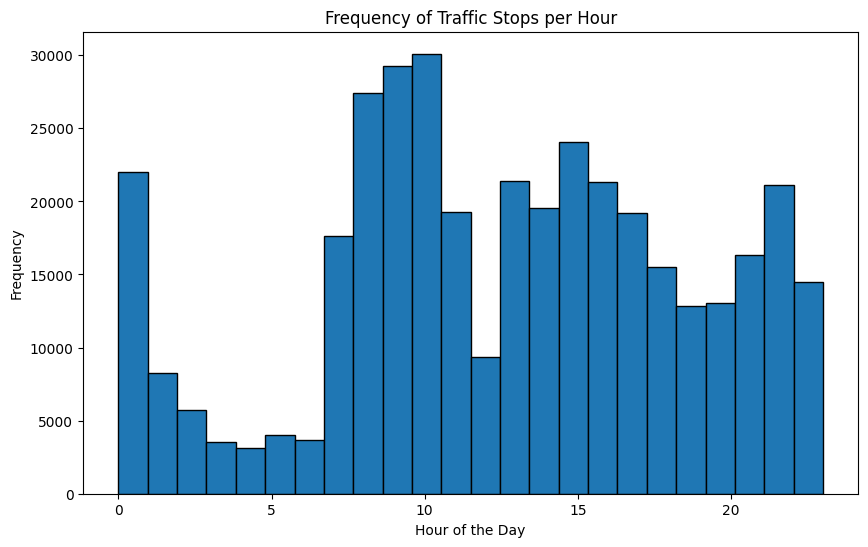

In [134]:
df['hour'].plot(kind='hist', bins=24, edgecolor='black', figsize=(10, 6))

plt.title("Frequency of Traffic Stops per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")

plt.show()


# Day Vs Traffic Stops


In [135]:
end_month_citations = df[df['citation_issued'] == True].groupby('day').size()
print(end_month_citations)

# No real correlation

day
1.0     7120
2.0     7632
3.0     7869
4.0     7202
5.0     7561
6.0     6739
7.0     6679
8.0     7463
9.0     7562
10.0    7490
11.0    7604
12.0    7261
13.0    7314
14.0    7101
15.0    7482
16.0    7355
17.0    7399
18.0    7716
19.0    7226
20.0    7058
21.0    7999
22.0    7041
23.0    7260
24.0    7119
25.0    7125
26.0    7164
27.0    6440
28.0    7231
29.0    6557
30.0    6237
31.0    3989
dtype: int64


# Ages

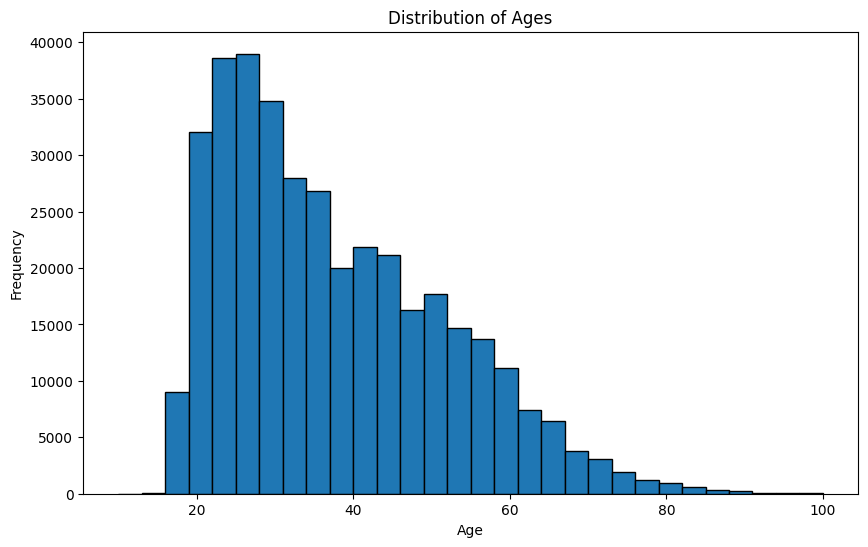

In [136]:
plt.figure(figsize=(10, 6))
df['subject_age'].plot(kind='hist', bins=30, edgecolor='black')

plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Race

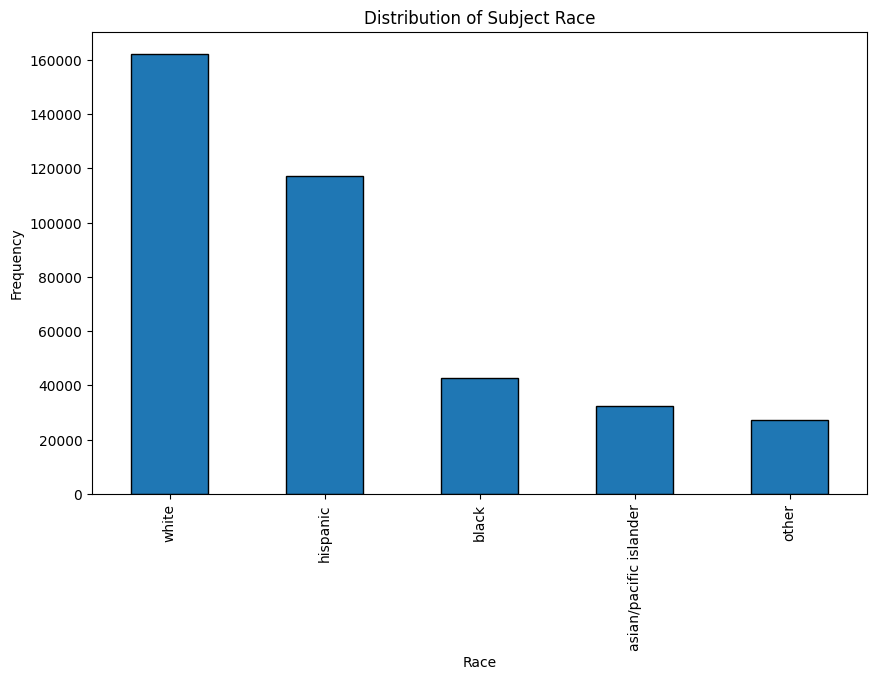

In [137]:
race_counts = df['subject_race'].value_counts()

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', edgecolor='black')

plt.title("Distribution of Subject Race")
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.show()

# Race x Age

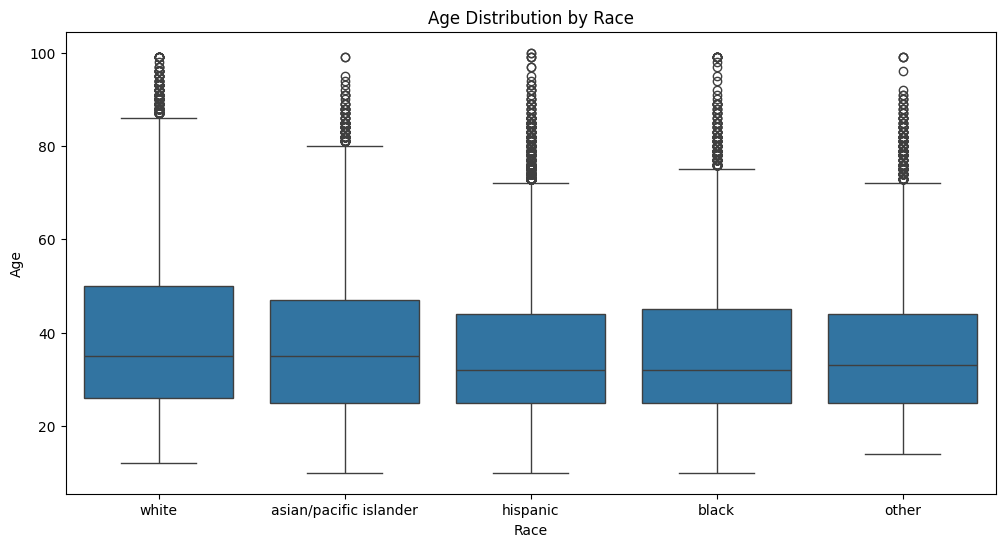

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subject_race', y='subject_age', data=df)

plt.title("Age Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Age")
plt.show()

# Age by Race (Stacked and Normalized)


<ipython-input-139-d6695adec180>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)


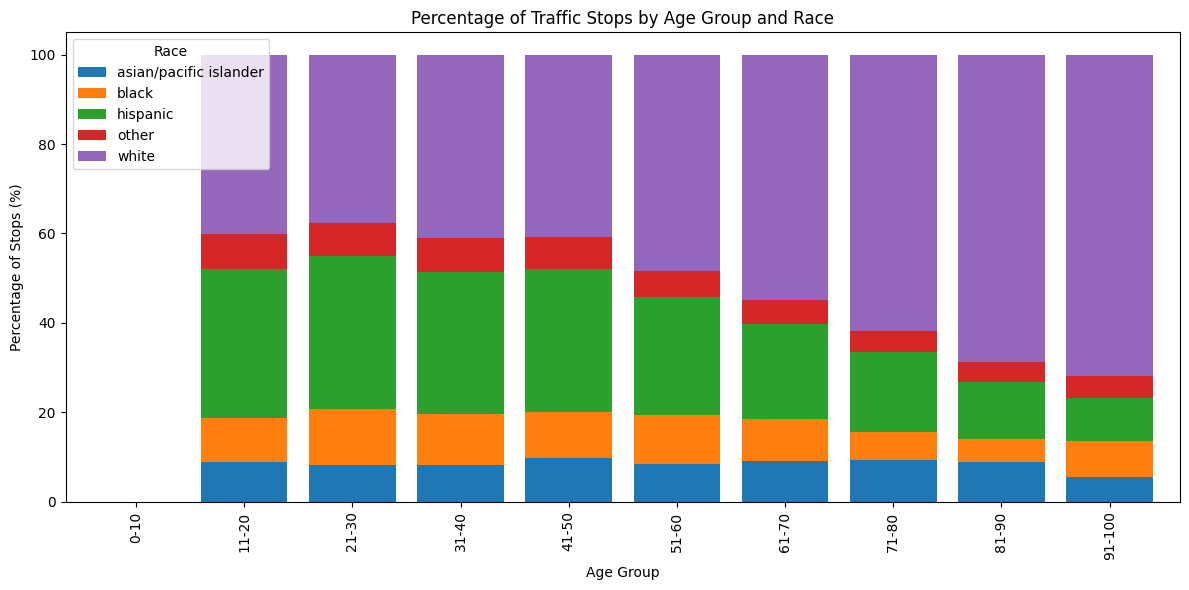

In [139]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_group'] = pd.cut(df['subject_age'], bins=age_bins, labels=age_labels, right=False)
age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)

age_race_percentage = age_race_counts.div(age_race_counts.sum(axis=1), axis=0) * 100

ax = age_race_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), width = 0.8)

plt.title("Percentage of Traffic Stops by Age Group and Race")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Stops (%)")
plt.legend(title="Race")
plt.tight_layout()
plt.show()

# Age by Race (Stacked with Raw Counts)

<ipython-input-140-9f718657525c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)


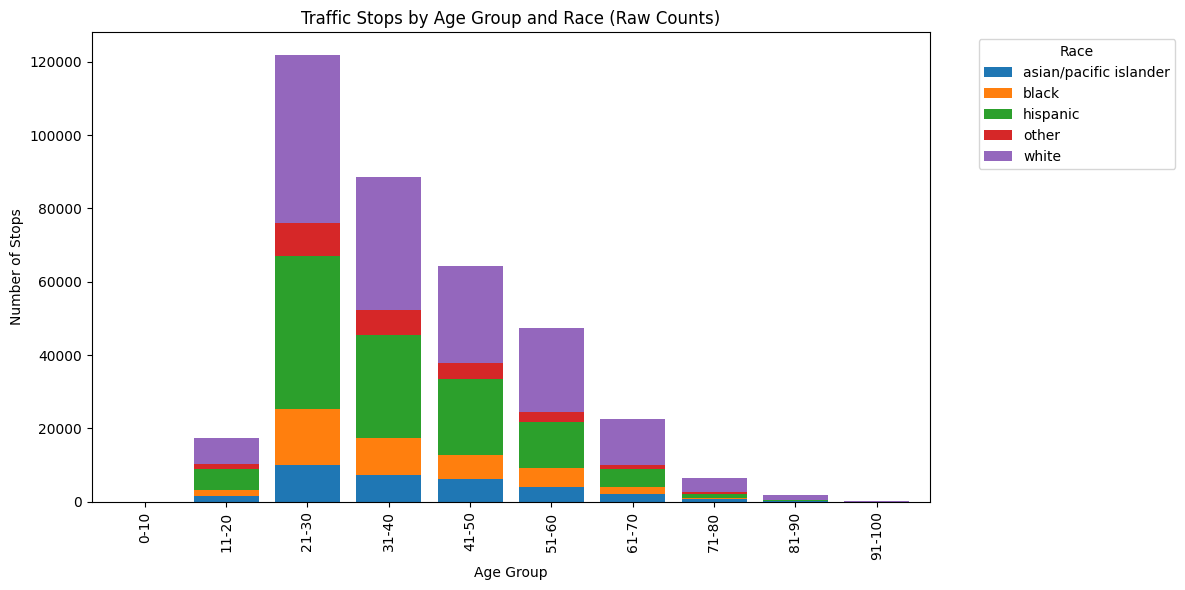

In [140]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_group'] = pd.cut(df['subject_age'], bins=age_bins, labels=age_labels, right=False)

age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)

ax = age_race_counts.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)
plt.title("Traffic Stops by Age Group and Race (Raw Counts)")
plt.xlabel("Age Group")
plt.ylabel("Number of Stops")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


# Age by Race (Grouped)


<ipython-input-141-36d03aed5589>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)


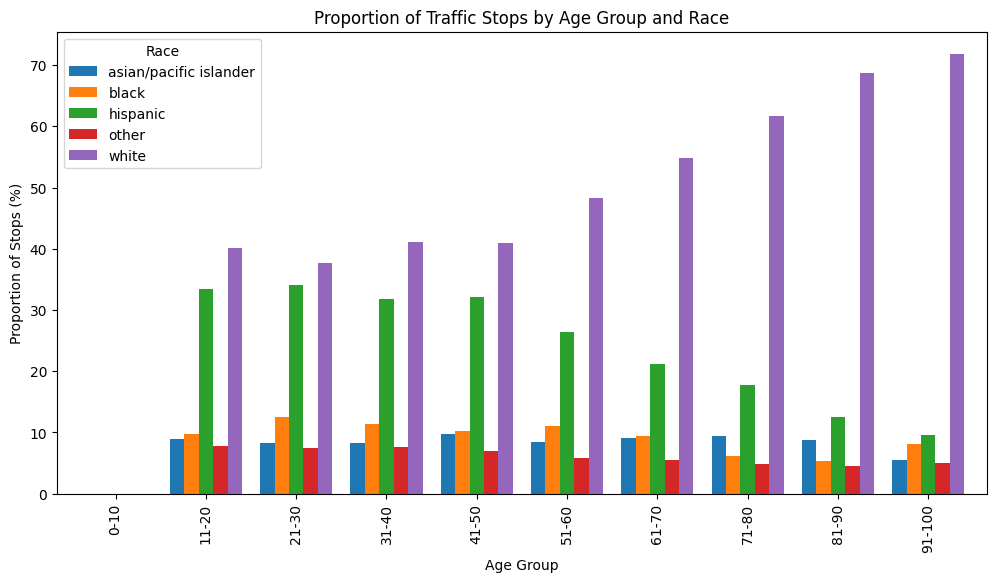

In [141]:
age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)

age_race_percentage = age_race_counts.div(age_race_counts.sum(axis=1), axis=0) * 100

ax = age_race_percentage.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title("Proportion of Traffic Stops by Age Group and Race")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Stops (%)")
plt.legend(title="Race")
plt.show()

# Officer Evaluation

In [142]:
# search_success_by_service = df[df['search_conducted'] == 'Yes'].groupby('officer_years_of_service')['contraband_found'].mean()
# print(search_success_by_service)

# Women vs Men!
The point of checking the total amount of entries with Citation, Verbal Warning, and Written Warning is to ensure there are enough entries to be able to erase all the ones that have something like "Citation|Verbal Warning| Citation"

In [143]:
#print(df['raw_action_taken'].unique())

a = ((df['raw_action_taken'] == 'Citation').sum())
b = ((df['raw_action_taken'] == 'Verbal Warning').sum())
c = ((df['raw_action_taken'] == 'Written Warning').sum())
total = (df['raw_action_taken'].count())

proportion = (a + b + c) / total
#proportion

df_filtered = df[df['raw_action_taken'].isin(['Citation', 'Verbal Warning', 'Written Warning'])]



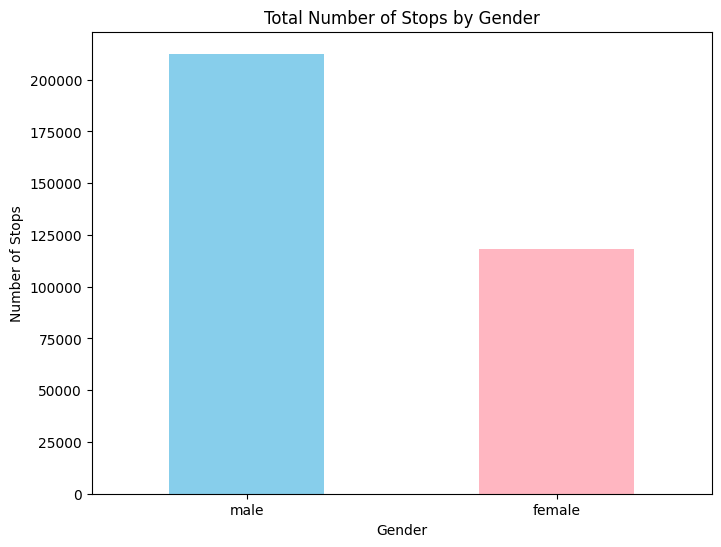

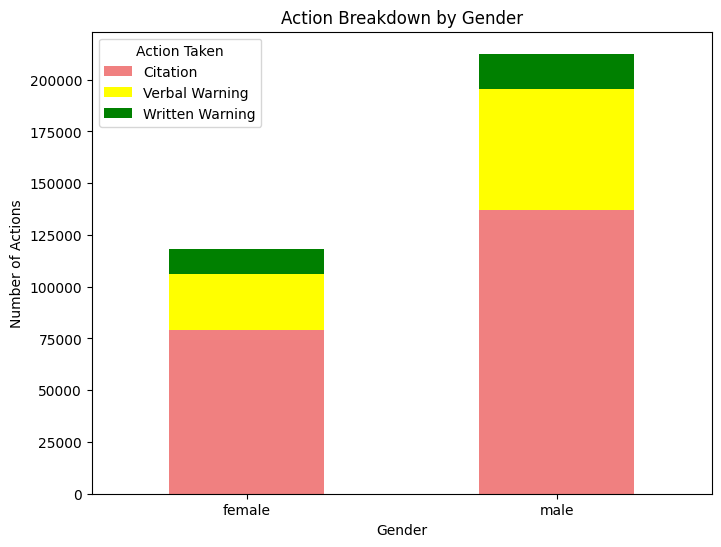

In [144]:
gender_counts = df_filtered['subject_sex'].value_counts()

action_counts = df_filtered.groupby(['subject_sex', 'raw_action_taken']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Total Number of Stops by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Stops')
plt.xticks(rotation=0)
plt.show()

# Plotting the action breakdown for each gender
action_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'yellow', 'green'])
plt.title('Action Breakdown by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Actions')
plt.xticks(rotation=0)
plt.legend(title='Action Taken')
plt.show()

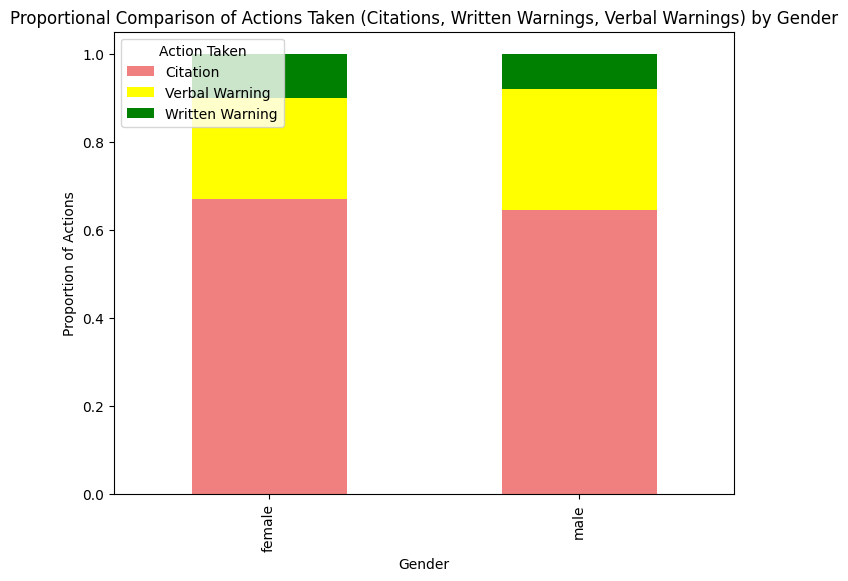

In [145]:
action_counts = df_filtered.groupby(['subject_sex', 'raw_action_taken']).size().unstack(fill_value=0)
action_counts_normalized = action_counts.div(action_counts.sum(axis=1), axis=0)
action_counts_normalized.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'yellow', 'green'])

plt.title('Proportional Comparison of Actions Taken (Citations, Written Warnings, Verbal Warnings) by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Actions')
plt.legend(title='Action Taken', loc='upper left')
plt.show()

# Vehicle information


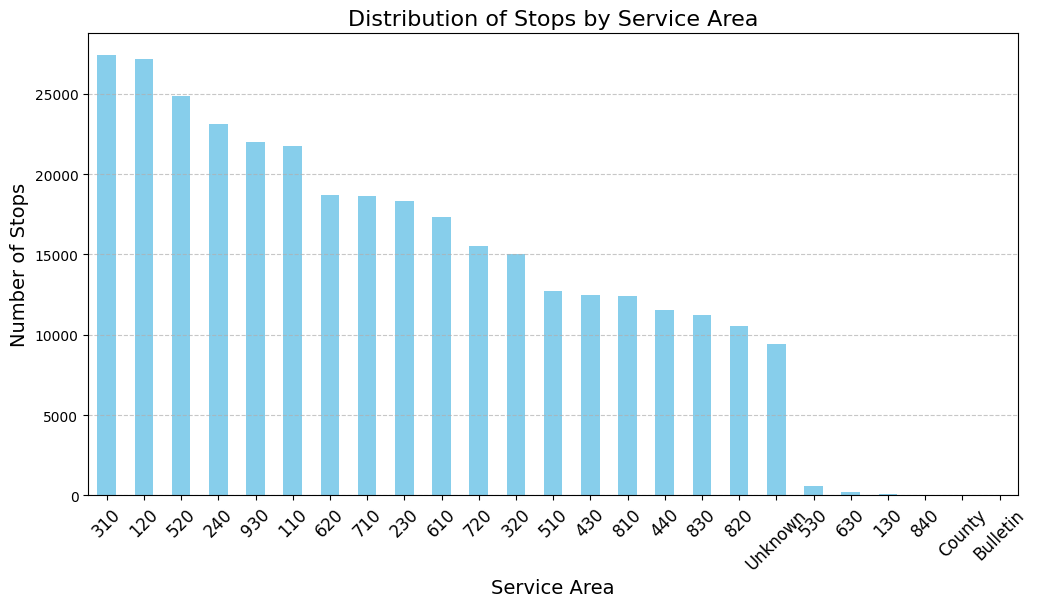

In [146]:

# Plotting a bar chart of stops by service area
stops_by_area = df_filtered['service_area'].value_counts()
stops_by_area.plot(kind='bar', color='skyblue', figsize=(12, 6))

plt.title('Distribution of Stops by Service Area', fontsize=16)
plt.xlabel('Service Area', fontsize=14)
plt.ylabel('Number of Stops', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


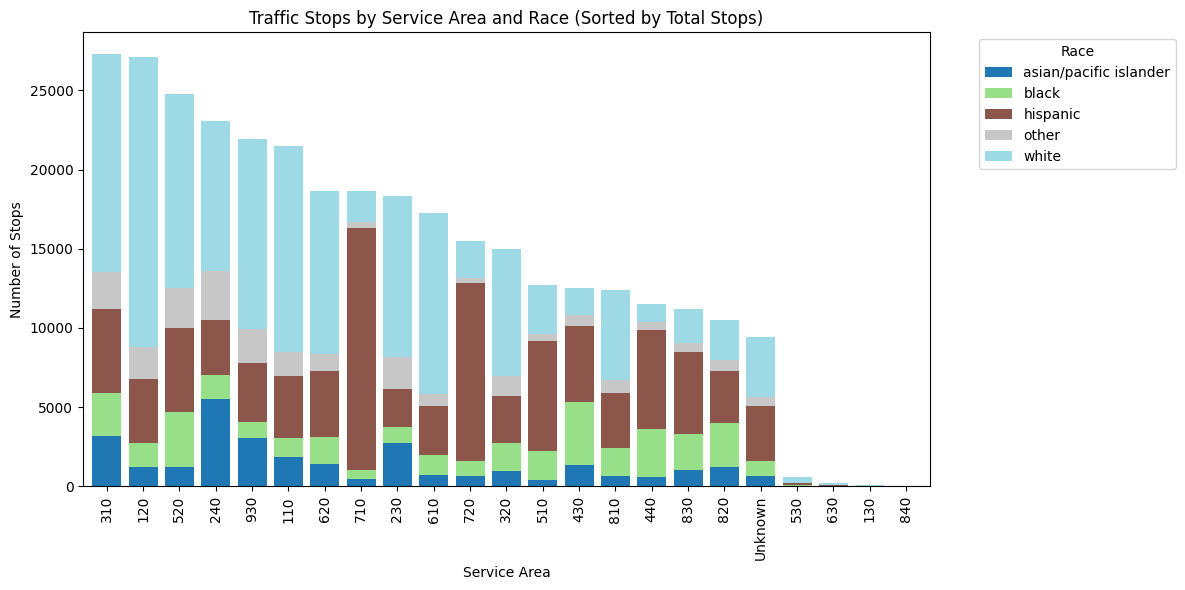

In [147]:
# group data by service area and race
service_area_race_counts = df_filtered.groupby(['service_area', 'subject_race']).size().unstack(fill_value=0)

# sort by total stops in descending order
service_area_race_counts['Total_Stops'] = service_area_race_counts.sum(axis=1)
service_area_race_counts = service_area_race_counts.sort_values(by='Total_Stops', ascending=False)  # Sort by total stops
service_area_race_counts = service_area_race_counts.drop(columns='Total_Stops')  # Remove the total stops column (optional)

# plot the sorted bar chart
ax = service_area_race_counts.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8, colormap='tab20')
plt.title("Traffic Stops by Service Area and Race (Sorted by Total Stops)")
plt.xlabel("Service Area")
plt.ylabel("Number of Stops")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [148]:
# Filter data for a specific service area (e.g., 710)
service_area_710 = df_filtered[df_filtered['service_area'] == 710]

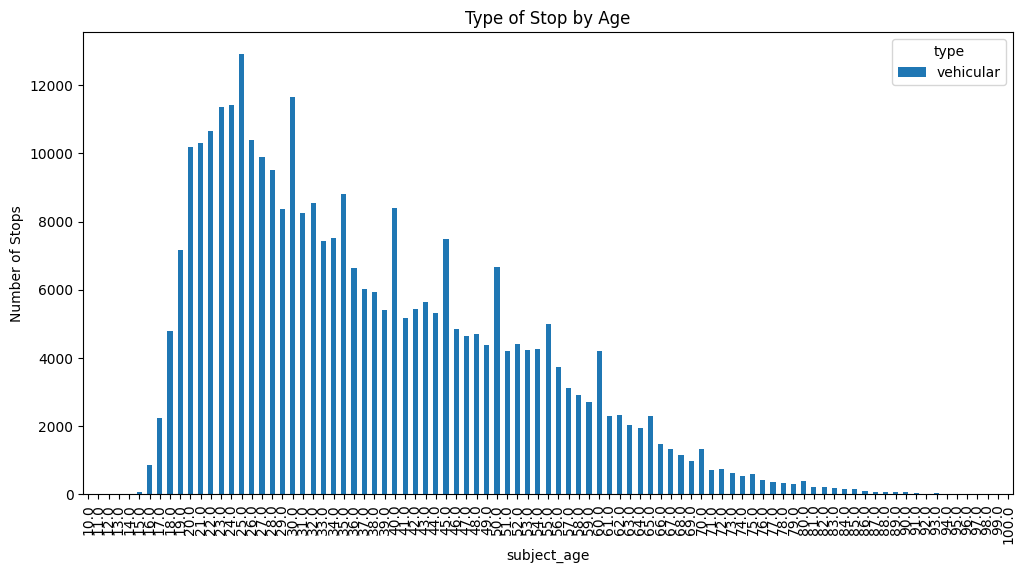

In [149]:
age_type_counts = df_filtered.groupby(['subject_age', 'type']).size().unstack()
age_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Type of Stop by Age')
plt.ylabel('Number of Stops')
plt.show()


<ipython-input-150-0ba49ebff36b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


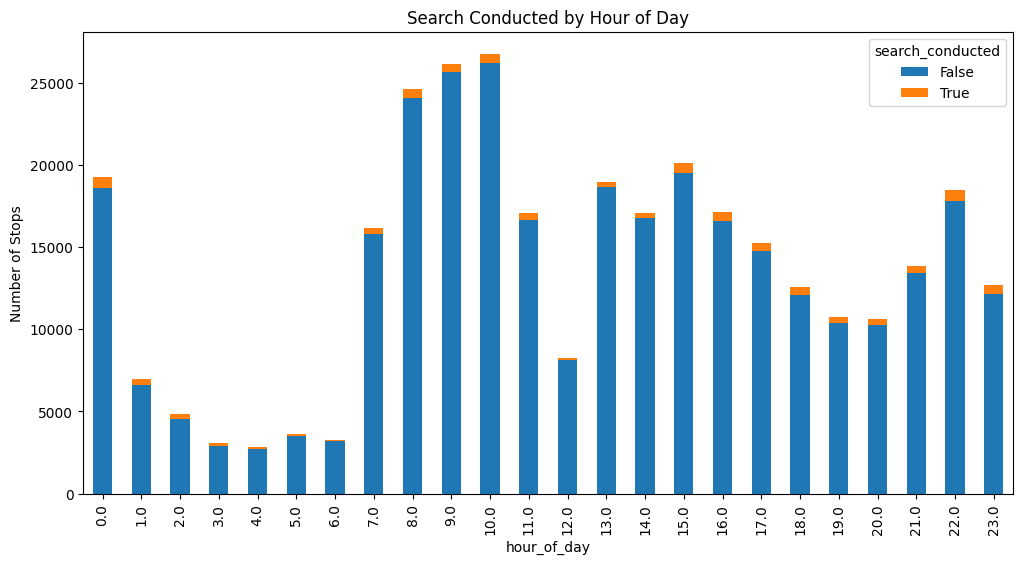

In [150]:
df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour
search_time_counts = df_filtered.groupby(['hour_of_day', 'search_conducted']).size().unstack()
search_time_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Conducted by Hour of Day')
plt.ylabel('Number of Stops')
plt.show()


<ipython-input-151-2cbe88cd1baa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


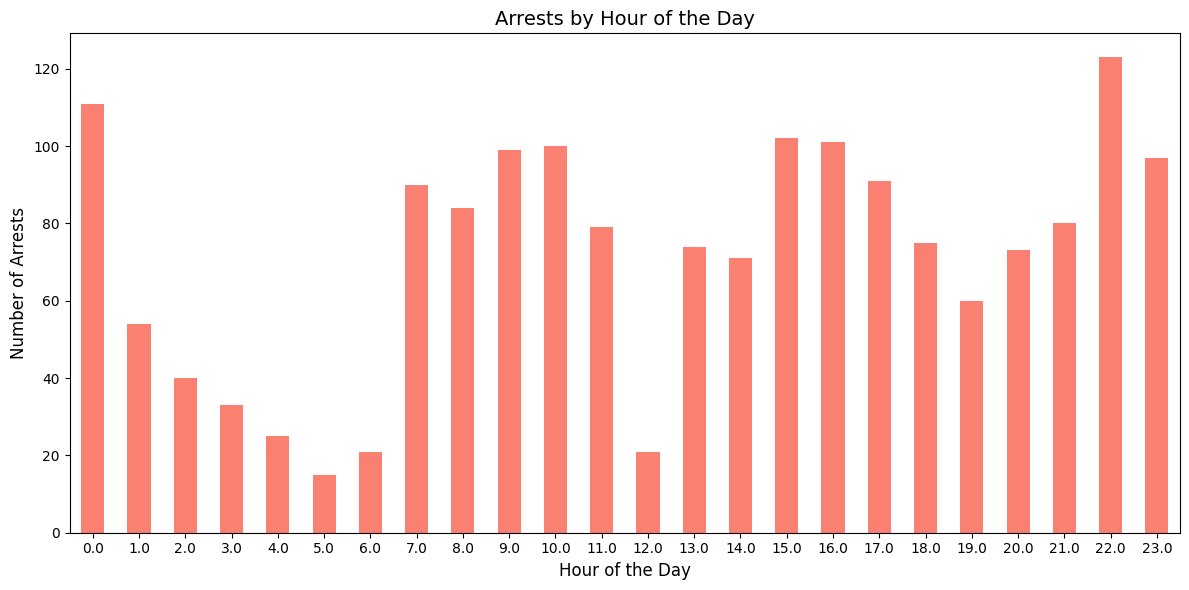

hour_of_day
0.0     111
1.0      54
2.0      40
3.0      33
4.0      25
5.0      15
6.0      21
7.0      90
8.0      84
9.0      99
10.0    100
11.0     79
12.0     21
13.0     74
14.0     71
15.0    102
16.0    101
17.0     91
18.0     75
19.0     60
20.0     73
21.0     80
22.0    123
23.0     97
dtype: int64


In [151]:

# Extract hour of day from the time column
df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour

# Filter data for arrests (arrest_made == True)
df_arrests = df_filtered[df_filtered['arrest_made'] == True]

# Group by hour of day and arrest_made, then count the occurrences
search_time_counts = df_arrests.groupby('hour_of_day').size()

# Plot the filtered data (only arrests)
search_time_counts.plot(kind='bar', figsize=(12, 6), color='salmon')

# Customize plot with title and labels
plt.title('Arrests by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, display the counts for inspection
print(search_time_counts)

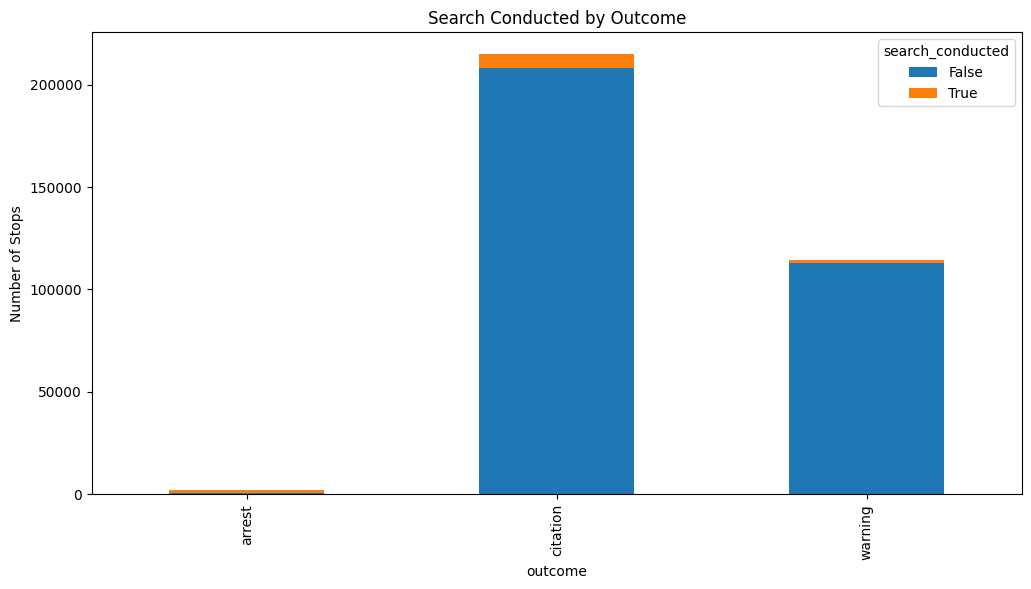

In [152]:
outcome_search_counts = df_filtered.groupby(['outcome', 'search_conducted']).size().unstack()
outcome_search_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Conducted by Outcome')
plt.ylabel('Number of Stops')
plt.show()

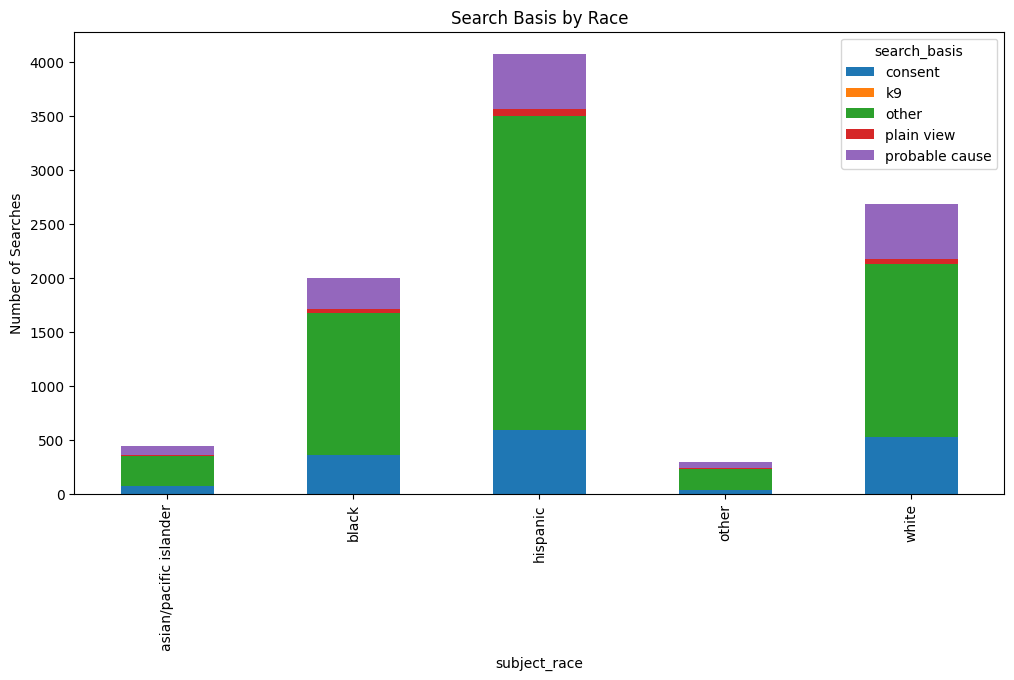

In [153]:
race_search_basis = df_filtered.groupby(['subject_race', 'search_basis']).size().unstack()
race_search_basis.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Basis by Race')
plt.ylabel('Number of Searches')
plt.show()

<ipython-input-154-1ff449cf32cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()


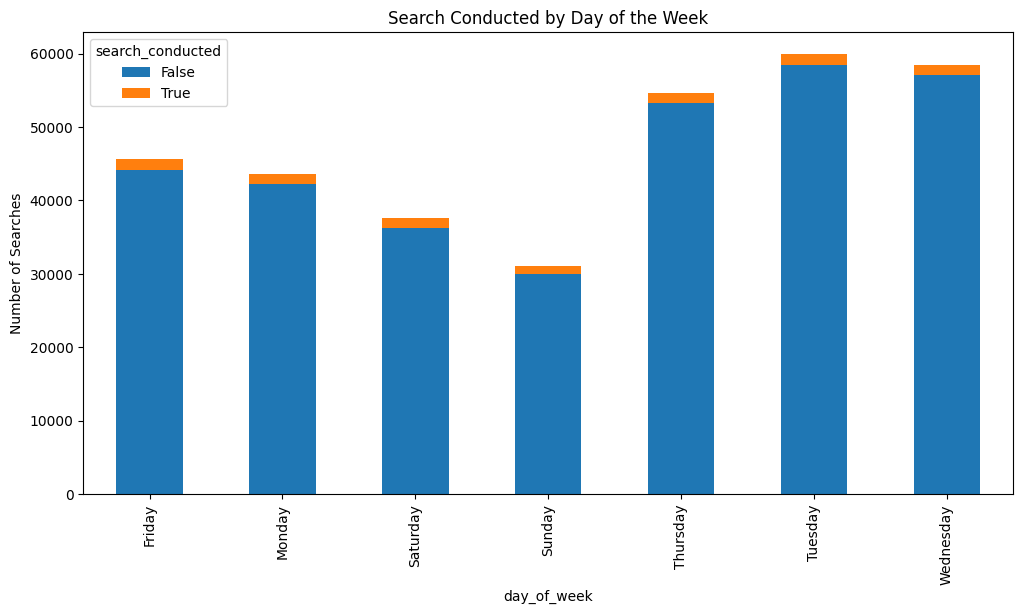

In [154]:
df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()
search_by_day = df_filtered.groupby(['day_of_week', 'search_conducted']).size().unstack()
search_by_day.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Conducted by Day of the Week')
plt.ylabel('Number of Searches')
plt.show()

In [155]:
# arrest_by_reason = df_filtered.groupby('reason_for_stop')['arrest_made'].mean()
# arrest_by_reason.plot(kind='bar', figsize=(12, 6))
# plt.title('Arrest Rate by Reason for Stop')
# plt.ylabel('Arrest Rate')
# plt.show()

In [156]:
# arrest_by_reason_time = df_filtered.groupby(['reason_for_stop', 'hour_of_day'])['arrest_made'].mean()
# arrest_by_reason_time.unstack().plot(kind='line', figsize=(12, 6))
# plt.title('Arrest Rate by Reason for Stop and Hour of Day')
# plt.ylabel('Arrest Rate')
# plt.show()

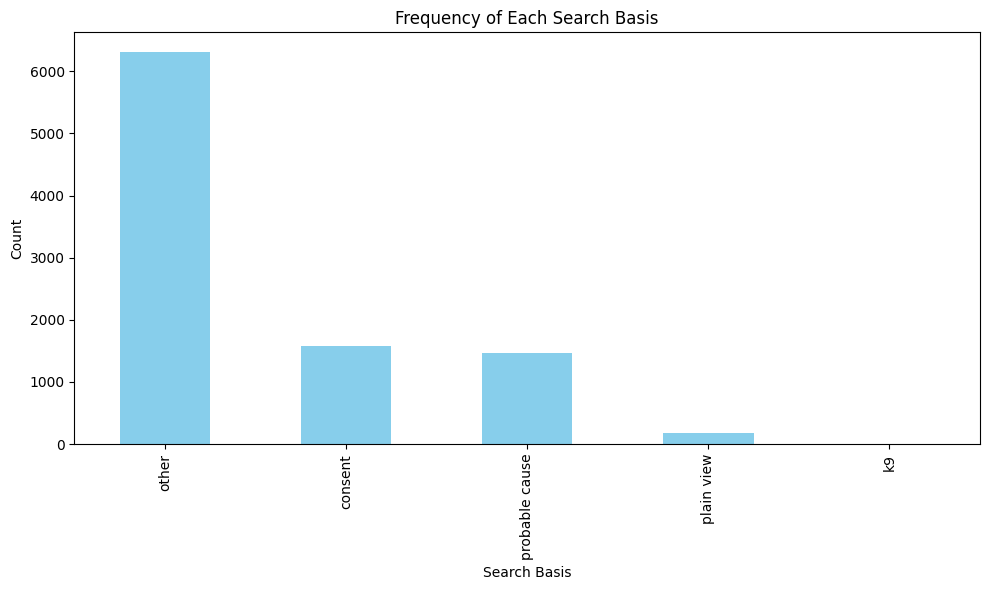

search_basis
other             6310
consent           1585
probable cause    1464
plain view         171
k9                   1
Name: count, dtype: int64


In [157]:
# Count the occurrences of each search basis
search_basis_counts = df_filtered['search_basis'].value_counts()

# Plot the counts of each search basis
search_basis_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Frequency of Each Search Basis')
plt.xlabel('Search Basis')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Optionally, display the counts
print(search_basis_counts)








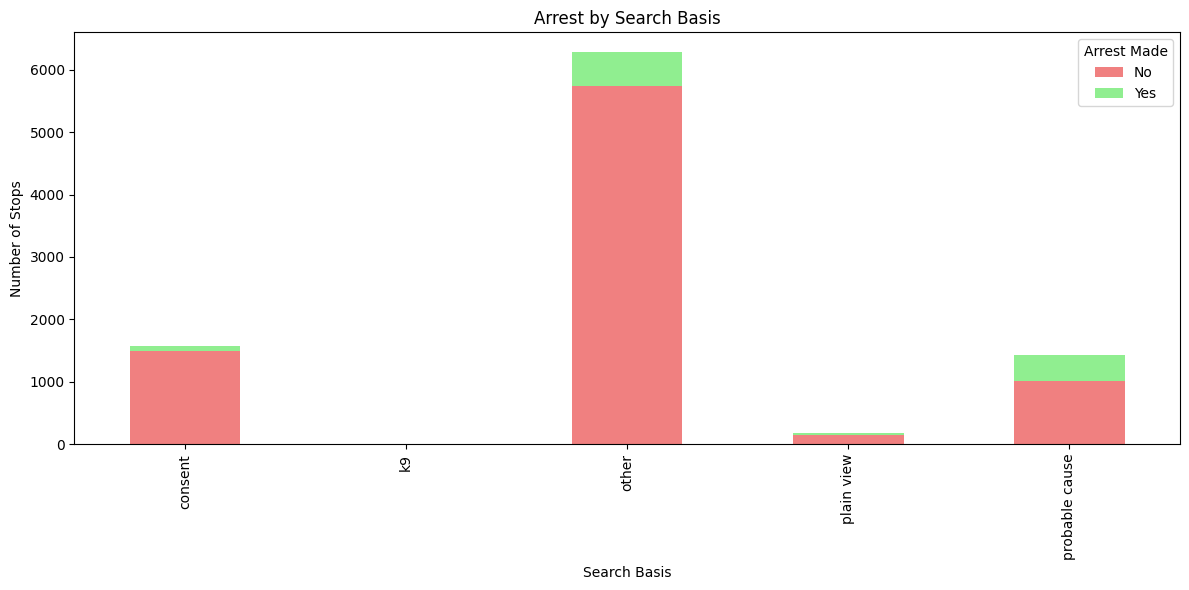

arrest_made     False  True 
search_basis                
consent          1496     83
k9                  1      0
other            5748    539
plain view        140     30
probable cause   1010    420


In [158]:
# Group by search_basis and arrest_made to get counts
search_basis_arrest = df_filtered.groupby(['search_basis', 'arrest_made']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
search_basis_arrest.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightcoral', 'lightgreen'])
plt.title('Arrest by Search Basis')
plt.xlabel('Search Basis')
plt.ylabel('Number of Stops')
plt.legend(title='Arrest Made', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_arrest)


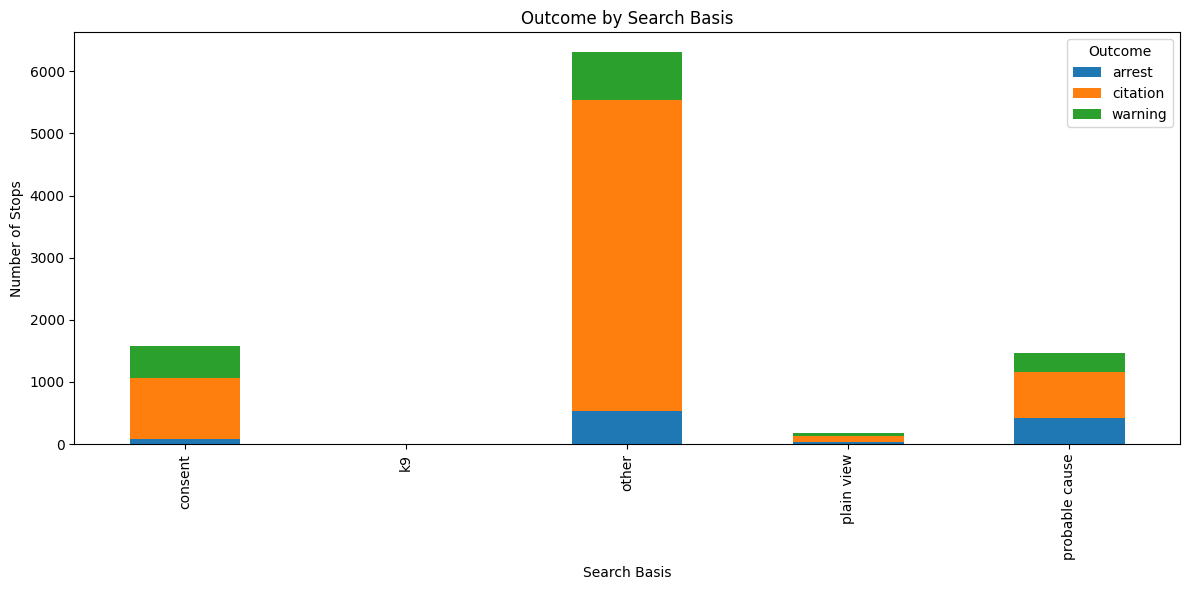

outcome         arrest  citation  warning
search_basis                             
consent             83       973      529
k9                   0         1        0
other              539      4994      777
plain view          30       107       34
probable cause     420       745      299


In [159]:
# Group by search_basis and outcome to get counts
search_basis_outcome = df_filtered.groupby(['search_basis', 'outcome']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
search_basis_outcome.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Outcome by Search Basis')
plt.xlabel('Search Basis')
plt.ylabel('Number of Stops')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_outcome)


<ipython-input-160-fa45bb4f3fc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


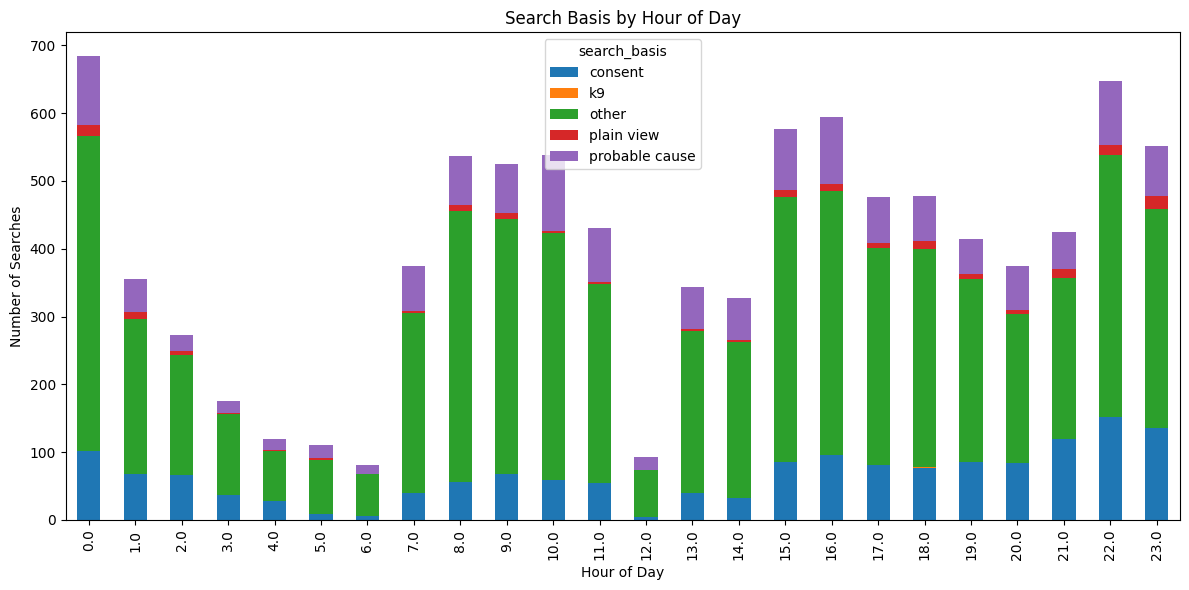

search_basis  consent  k9  other  plain view  probable cause
hour_of_day                                                 
0.0               101   0    466          16             102
1.0                68   0    228          10              50
2.0                66   0    177           6              23
3.0                36   0    120           2              17
4.0                28   0     73           2              16
5.0                 8   0     81           2              20
6.0                 6   0     62           0              13
7.0                39   0    266           3              66
8.0                56   0    400           8              73
9.0                67   0    377           8              73
10.0               59   0    364           3             112
11.0               54   0    294           3              79
12.0                4   0     70           0              18
13.0               39   0    239           4              61
14.0               32   

In [160]:
# Create an hour_of_day column
df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour

# Group by hour_of_day and search_basis to get counts
search_basis_hour = df_filtered.groupby(['hour_of_day', 'search_basis']).size().unstack(fill_value=0)

# Plot the data
search_basis_hour.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Basis by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Searches')
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_hour)


<ipython-input-161-c92ff8dc934c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()


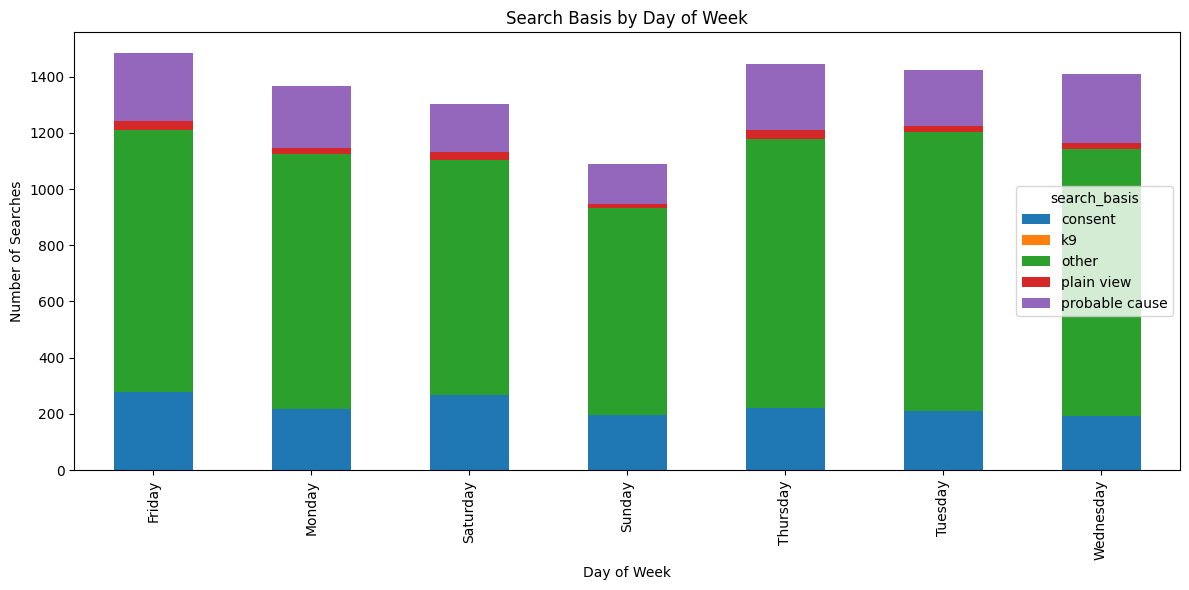

search_basis  consent  k9  other  plain view  probable cause
day_of_week                                                 
Friday            278   0    932          32             241
Monday            217   0    908          21             220
Saturday          266   0    838          26             172
Sunday            196   0    735          17             141
Thursday          223   0    956          30             235
Tuesday           210   1    992          22             197
Wednesday         194   0    948          22             245


In [161]:
# Create a day_of_week column
df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()

# Group by day_of_week and search_basis to get counts
search_basis_day = df_filtered.groupby(['day_of_week', 'search_basis']).size().unstack(fill_value=0)

# Plot the data
search_basis_day.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Basis by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Searches')
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_day)


<ipython-input-162-6c0e2b2b9c18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d')
<ipython-input-162-6c0e2b2b9c18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['date'].dt.day_name()


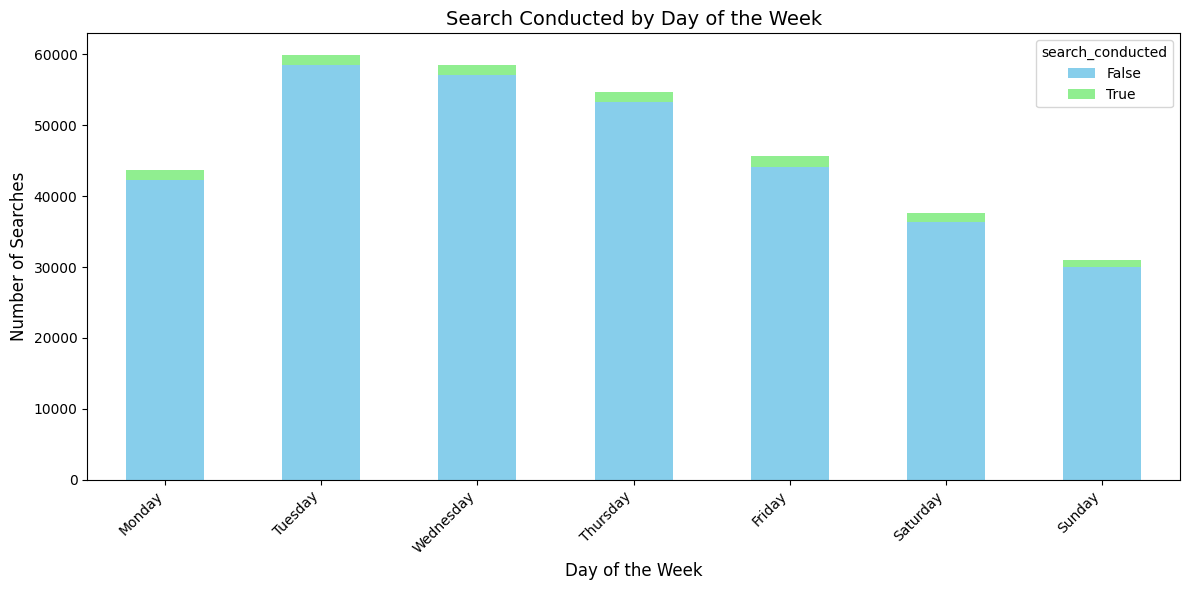

search_conducted  False  True 
day_of_week                   
Monday            42267   1366
Tuesday           58512   1422
Wednesday         57039   1409
Thursday          53215   1444
Friday            44129   1483
Saturday          36299   1302
Sunday            29946   1089


In [162]:

# Ensure 'date' column is in datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d')

# Extract day of the week as a string (e.g., 'Monday', 'Tuesday', etc.)
df_filtered['day_of_week'] = df_filtered['date'].dt.day_name()

# Group data by day of the week and search_conducted (True/False)
search_by_day = df_filtered.groupby(['day_of_week', 'search_conducted']).size().unstack(fill_value=0)

# Reorder days of the week to ensure they appear in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
search_by_day = search_by_day.loc[day_order]

# Plot the data as a stacked bar chart
search_by_day.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightgreen'])

# Enhance plot with title, labels, and better formatting
plt.title('Search Conducted by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Searches', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure everything fits nicely

# Display the plot
plt.show()

# Optional: Display the grouped data for inspection
print(search_by_day)